In [1]:
import numpy as np
from matplotlib.colors import ListedColormap

In [12]:
class Perceptron:
    def __init__(self, num_feature, learning_rate):
#         self.w = np.random.uniform(size=num_feature+1)
        self.w = np.zeros((num_feature+1,))
        self.eta = learning_rate
        self.errors = []
        
    def forward(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return self.step_function(z)
    
    @staticmethod
    def step_function(z):
        return np.where(z >= 0., 1, -1)
    
    def per_sample_training(self, sample, target):
        pred = self.forward(sample)
        error = target - pred
        delta = self.eta * error * np.concatenate([(1.,), sample], axis=0)
        self.w += delta
        return error
        
    def fit(self, X, y, iteration):
        num_sample = X.shape[0]
        print('init weights:', self.w)
        for epoch in range(iteration):
            print(f'{epoch} epoch start:')
            epoch_error = 0
            for sample, target in zip(X, y):
                error = self.per_sample_training(sample, target)
                epoch_error += int(error != 0)
                if error != 0:
                    print('new weights:', self.w)
            self.errors.append(epoch_error)
            print(f'{epoch} epoch - error: {epoch_error}/{num_sample}')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt

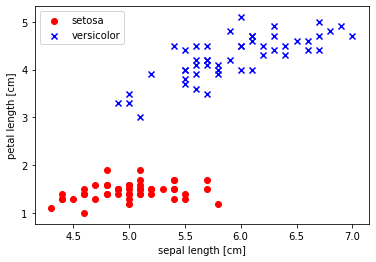

In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

init weights: [0. 0. 0.]
0 epoch start:
new weights: [-0.2  -1.02 -0.28]
new weights: [0.   0.38 0.66]
0 epoch - error: 2/100
1 epoch start:
new weights: [-0.2  -0.64  0.38]
new weights: [0.   0.76 1.32]
1 epoch - error: 2/100
2 epoch start:
new weights: [-0.2  -0.26  1.04]
new weights: [-0.4  -1.18  0.74]
new weights: [-0.2   0.22  1.68]
2 epoch - error: 3/100
3 epoch start:
new weights: [-0.4 -0.8  1.4]
new weights: [-0.2   0.34  2.1 ]
3 epoch - error: 2/100
4 epoch start:
new weights: [-0.4  -0.68  1.82]
4 epoch - error: 1/100
5 epoch start:
5 epoch - error: 0/100
6 epoch start:
6 epoch - error: 0/100
7 epoch start:
7 epoch - error: 0/100
8 epoch start:
8 epoch - error: 0/100
9 epoch start:
9 epoch - error: 0/100


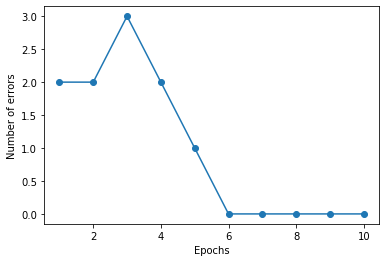

In [13]:
perceptron = Perceptron(num_feature=2, learning_rate=.1)

perceptron.fit(X, y, iteration=10)

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

def plot_decision_regions(X, y, classifier, resolution=.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.forward(np.array([xx1.flatten(), xx2.flatten()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        cl_sample = X[y==cl]
        plt.scatter(x=cl_sample[..., 0], y=cl_sample[..., 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

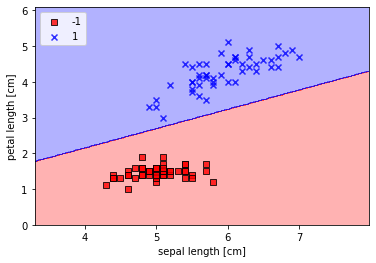

In [9]:
plot_decision_regions(X, y, perceptron)